<a href="https://colab.research.google.com/github/Jawad-Flahi/Creditcard-Fraud/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Problem statement:-

The aim of the project is to predict fraudulent credit card transactions using machine learning models.<br>
Data is highly imbalanced 
 


## Steps:-
Discourse of the project.
1. Reading, understanding ,visualising the data
2. Preparing the data for modelling
3. Building the model(First on imbalnced data then on balanced data)
4. Evaluate the model

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Exploratory data analysis

#### Loadind the data and analysing it

In [ ]:
# Reading the dataset
df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Missing values

####  Missing values in columns

In [ ]:
 df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

No missing values

#### Duplicate values

In [ ]:
df.duplicated().sum()

1081

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

### Checking the distribution of the classes

In [ ]:
classes = df['Class'].value_counts()
classes

0    283253
1       473
Name: Class, dtype: int64

In [ ]:
normal_share = round((classes[0]/df['Class'].count()*100),2)
normal_share

99.83

In [ ]:
fraud_share = round((classes[1]/df['Class'].count()*100),2)
fraud_share

0.17

We can see that there is only 0.17% frauds. We will take care of the class imbalance later.

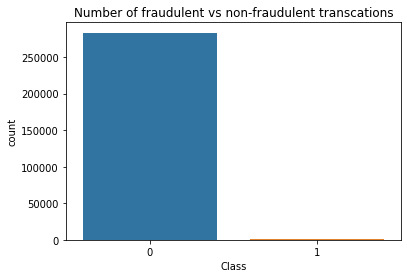

In [ ]:
# Visulasing with barplot
sns.countplot(x='Class', data=df)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

## Outliers treatment

We are not performing any outliers treatment for this particular dataset. Because all the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data.

### Observe the distribution of classes with time

In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# Creating fraudulent dataframe
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud =df[df['Class'] == 0]

In [ ]:
data_fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [ ]:
data_fraud.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

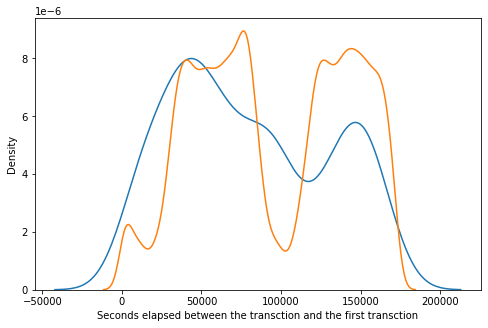

In [ ]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

##### Analysis
We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time.
Hence, we can drop the `Time` column.

In [ ]:
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)

### Observe the distribution of classes with amount

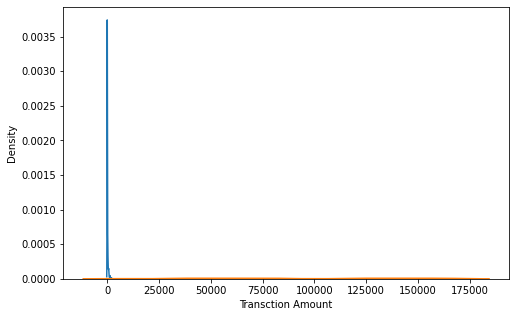

In [ ]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

##### Analysis
We can see that the fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount. 

## Train-Test Split

In [ ]:
# Import library
from sklearn.model_selection import train_test_split

In [ ]:
# Putting feature variables into X
X = df.drop(['Class'], axis=1)

In [ ]:
# Putting target variable to y
y = df['Class']

In [ ]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling
We need to scale only the `Amount` column as all other columns are already scaled by the PCA transformation.

In [ ]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [ ]:
# Instantiate the Scaler
scaler = StandardScaler()

In [ ]:
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [ ]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
10201,-3.544583,-2.017945,0.533444,-0.257317,-3.258624,2.628180,2.337337,-1.192511,1.896110,1.731256,2.826955,-3.483972,0.799653,-0.067525,0.315482,0.817446,1.096814,-1.091472,0.900169,-2.486676,-0.673491,1.488596,0.212412,-0.178197,-0.065951,-0.041249,-0.842003,0.510324,2.255746
276263,0.091427,0.981931,-0.333003,-0.637487,0.932788,-0.502517,0.849190,0.060425,-0.300482,-0.669539,1.148706,0.573724,-0.211587,-0.786554,-0.889658,0.438790,0.222185,0.163276,-0.055758,0.007894,-0.278727,-0.684828,0.101051,0.598491,-0.486898,0.092747,0.221936,0.074431,-0.345553
176633,0.210133,1.132638,-1.498822,-0.290631,0.927390,-0.516531,0.716152,0.162324,-0.333188,-1.196938,-1.117695,0.338297,1.511651,-0.841250,0.602760,0.397824,0.212996,0.843011,0.025920,-0.032018,0.307387,0.858692,-0.086730,-0.006624,-0.092105,-0.145166,-0.077319,-0.042017,-0.181667
126008,-6.964205,6.675916,-4.436875,0.985868,-2.844862,2.510583,-8.944899,-12.314133,-2.506145,-3.499423,-0.085754,2.434355,-1.907842,3.560752,0.134389,1.889866,2.836012,1.439494,-0.892249,3.648163,-7.220393,2.613104,1.607706,-0.592293,-0.348290,-0.373577,-0.523881,0.266759,-0.346698
215215,-0.562231,0.223597,-0.724938,-1.140259,1.241340,-1.856683,1.416694,-0.633017,-0.468428,-0.305738,-0.783247,0.035867,0.445140,0.355516,-0.089126,-0.241890,-0.452120,-0.742859,0.130298,-0.375133,0.061771,0.469512,0.332842,-0.003599,-0.013264,1.283713,-0.245104,-0.047722,-0.311213


##### Scaling the test set


In [ ]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
174240,1.933240,-1.316851,0.425610,-0.354184,-1.854467,-0.021007,-1.602457,0.219034,0.271361,0.937272,0.608522,0.672180,0.338396,-0.389309,0.109958,-0.501147,-0.679960,2.170195,-1.004120,-0.484497,-0.069772,0.311095,0.293697,0.082676,-0.745557,0.597068,0.016508,-0.031391,-0.137577
277496,-1.592290,1.511862,-1.410847,-1.175748,2.867225,3.524474,0.495902,1.614884,-1.271709,-1.257424,-0.754626,0.138662,-0.534703,1.164244,-0.758920,-0.284964,-0.170883,-0.526737,-0.826569,-0.379965,0.100349,-0.083137,-0.474007,0.695183,1.356110,-0.486276,-0.350054,-0.118218,-0.181272
105198,-0.976564,0.585510,-0.003142,-0.945268,3.539277,2.916666,0.460135,0.831828,-1.095137,-0.601215,-0.305021,-0.245658,-0.277591,0.588377,0.340338,0.388287,-1.014098,-0.114375,-0.198850,0.101061,-0.297875,-1.264529,-0.179137,0.936423,0.677656,-0.705164,0.000772,0.064120,-0.342751
227782,1.780293,-1.063671,0.680026,0.841410,-1.653529,0.392116,-1.514345,0.467485,2.093653,0.028845,0.071605,0.465802,-1.627510,-0.424180,-1.020949,0.489706,-0.404125,0.818933,0.090235,-0.227392,0.203172,0.798490,0.178572,0.094661,-0.515228,0.371839,0.026977,-0.036803,-0.161379
116080,-1.153910,1.533617,0.434139,-0.495930,0.378126,-0.067809,0.530507,0.229062,0.300117,0.817031,0.349626,-0.382182,-0.910048,-0.384144,0.474690,0.870161,-0.666024,0.812769,0.558308,0.497949,-0.456433,-0.912641,-0.160596,-0.944142,0.048795,0.090333,0.100562,-0.249673,-0.311213


## Checking the Skewness

Columns having negative skewness means tail of distribution is towards left side <br>
Columns having postive skewness means tail of distribution is towards right side

In [ ]:
X_train.skew()

V1        -3.260454
V2        -4.349626
V3        -2.251281
V4         0.668412
V5        -3.352289
V6         2.092054
V7         4.037291
V8        -8.195230
V9         0.538788
V10        1.238928
V11        0.331664
V12       -2.108005
V13        0.066349
V14       -1.811115
V15       -0.311015
V16       -0.982125
V17       -3.515354
V18       -0.245840
V19        0.108633
V20       -2.678589
V21        2.833464
V22       -0.167179
V23       -6.117248
V24       -0.551480
V25       -0.436502
V26        0.585893
V27       -0.457333
V28        8.309828
Amount    17.462867
dtype: float64

Colunms having skewness (- 0.5 to 0.5) distribution approxmatily symmetric <br>
Colunms having skewness geater than 1 or less than -1 are higly skewed <br>
Colunms having skewness between (-1 and -0.5) 0r (0.5 and 1) are moderatly skewed

In [ ]:
# Listing the columns
cols = X_train.columns
cols 

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

We see that there are many variables, which are heavily skewed. We will mitigate the skewness only for those variables for bringing them into normal distribution.

### Mitigate skweness with PowerTransformer

In [ ]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train[cols])

In [ ]:
# Transform the test set
X_test[cols] = pt.transform(X_test[cols])

In [ ]:
X_train.skew()

V1       -0.218271
V2        0.361641
V3       -0.080244
V4        0.018494
V5       -1.341110
V6       -1.859163
V7        2.778962
V8        2.328451
V9       -0.057289
V10      -1.339707
V11       0.057616
V12       0.140539
V13       0.006941
V14       0.089906
V15       0.015426
V16       0.174909
V17      -0.841060
V18      -0.056691
V19       0.015302
V20      -1.239414
V21      -1.693249
V22      -0.018226
V23      -0.189990
V24       0.110485
V25       0.078053
V26      -0.024610
V27       3.588832
V28       0.727933
Amount    0.709362
dtype: float64

Now we can see that all the variables are normally distributed after the transformation.

# Model building on imbalanced data

### Metric selection for heavily imbalanced data


#### Why SVM was not tried for model building and Random Forest was not tried for few cases?
In the dataset we have 284807 datapoints and in the case of Oversampling we would have even more number of datapoints. SVM is not very efficient with large number of datapoints beacuse it takes lot of computational power and resources to make the transformation. When we perform the cross validation with K-Fold for hyperparameter tuning, it takes lot of computational resources and it is very time consuming. Hence, because of the unavailablity of the required resources and time SVM was not tried.

For the same reason Random forest was also not tried for model building in few of the hyperparameter tuning for oversampling technique.

#### Why KNN was not used for model building?
KNN is not memory efficient. It becomes very slow as the number of datapoints increases as the model needs to store all the data points. It is computationally heavy because for a single datapoint the algorithm has to calculate the distance of all the datapoints and find the nearest neighbors.

### Logistic regression

In [ ]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [ ]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

#### Tuning hyperparameter  C
C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.

In [ ]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=6, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 20,30,100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train, y_train)

Fitting 6 folds for each of 8 candidates, totalling 48 fits


GridSearchCV(cv=KFold(n_splits=6, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 20, 30, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.929328,0.044085,0.025228,0.003013,0.01,{'C': 0.01},0.996302,0.974175,0.963377,0.997144,0.965823,0.976839,0.978943,0.013380,1,0.978953,0.983832,0.985751,0.979355,0.984089,0.983345,0.982554,0.002518
1,1.382950,0.097882,0.023399,0.000284,0.1,{'C': 0.1},0.994019,0.976071,0.963406,0.994899,0.969890,0.970875,0.978193,0.012078,2,0.977788,0.982687,0.984596,0.978200,0.982684,0.983535,0.981582,0.002619
2,1.436601,0.034311,0.023393,0.000370,1,{'C': 1},0.993032,0.976575,0.962598,0.994133,0.970355,0.969333,0.977671,0.011961,3,0.977156,0.982206,0.984049,0.977620,0.982074,0.983105,0.981035,0.002662
3,1.450855,0.084674,0.023806,0.000618,10,{'C': 10},0.992898,0.976630,0.962493,0.994025,0.970405,0.969155,0.977601,0.011945,4,0.977073,0.982146,0.983969,0.977548,0.981994,0.983036,0.980961,0.002665
4,1.466819,0.066035,0.023318,0.000139,20,{'C': 20},0.992890,0.976631,0.962494,0.994017,0.970413,0.969141,0.977597,0.011942,5,0.977068,0.982141,0.983965,0.977543,0.981989,0.983034,0.980957,0.002665
5,1.459526,0.075570,0.023668,0.000342,30,{'C': 30},0.992888,0.976631,0.962489,0.994015,0.970412,0.969139,0.977596,0.011942,6,0.977066,0.982141,0.983964,0.977542,0.981987,0.983034,0.980956,0.002665
6,1.453396,0.068915,0.025106,0.002324,100,{'C': 100},0.992885,0.976634,0.962482,0.994012,0.970415,0.969136,0.977594,0.011943,7,0.977064,0.982139,0.983961,0.977540,0.981985,0.983031,0.980953,0.002665
7,1.453565,0.056249,0.023161,0.000310,1000,{'C': 1000},0.992883,0.976635,0.962480,0.994012,0.970413,0.969134,0.977593,0.011943,8,0.977063,0.982139,0.983960,0.977540,0.981984,0.983029,0.980952,0.002665


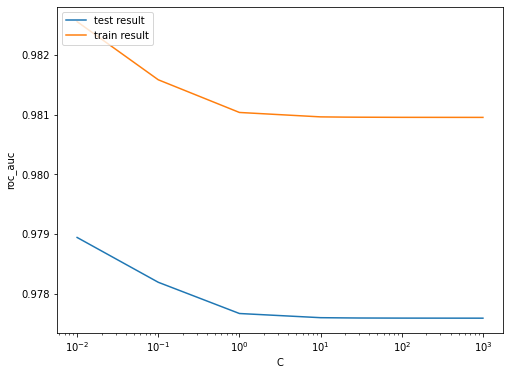

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9789432922581557 at C = 0.01


#### Logistic regression with optimal C

In [ ]:
# Instantiate the model with best C
logistic_imb = LogisticRegression(C=0.01)

In [ ]:
# Fit the model on the train set
logistic_imb_model = logistic_imb.fit(X_train, y_train)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = logistic_imb_model.predict(X_train)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[198260     28]
 [   140    180]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9991541126238621
Sensitivity:- 0.5625
Specificity:- 0.9998587912531267
F1-Score:- 0.6818181818181818


In [ ]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198288
           1       0.87      0.56      0.68       320

    accuracy                           1.00    198608
   macro avg       0.93      0.78      0.84    198608
weighted avg       1.00      1.00      1.00    198608



##### ROC on the train set

In [ ]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
# Predicted probability
y_train_pred_proba = logistic_imb_model.predict_proba(X_train)[:,1]

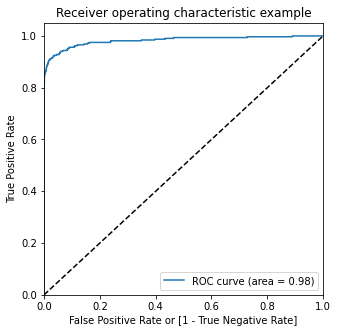

In [ ]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

We acheived very good ROC 0.99 on the train set.

#### Prediction on the test set

In [ ]:
# Prediction on the test set
y_test_pred = logistic_imb_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[84958     7]
 [   65    88]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9991541154632393
Sensitivity:- 0.5751633986928104
Specificity:- 0.9999176131348202
F1-Score:- 0.7096774193548387


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84965
           1       0.93      0.58      0.71       153

    accuracy                           1.00     85118
   macro avg       0.96      0.79      0.85     85118
weighted avg       1.00      1.00      1.00     85118



##### ROC on the test set

In [ ]:
# Predicted probability
y_test_pred_proba = logistic_imb_model.predict_proba(X_test)[:,1]

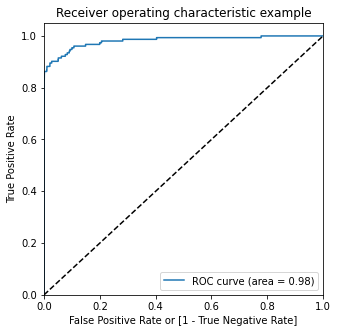

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

We can see that we have very good ROC on the test set 0.97, which is almost close to 1.

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 0.70
    - Specificity = 0.99
    - F1-Score = 0.76
    - ROC = 0.99
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.77
    - Specificity = 0.99
    - F1-Score = 0.65
    - ROC = 0.97

Overall, the model is performing well in the test set, what it had learnt from the train set.

### XGBoost

In [ ]:
# Importing XGBoost
from xgboost import XGBClassifier

##### Tuning the hyperparameters

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 6

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2,0.6], 
             'subsample': [0.6, 0.9],
              }          


# specify model
xgb_model = XGBClassifier(n_estimators=200,max_depth=2)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)       

Fitting 6 folds for each of 4 candidates, totalling 24 fits


GridSearchCV(cv=6, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6], 'subsample': [0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,51.299282,0.342499,0.189322,0.005189,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.961769,0.995329,0.995525,0.966606,0.969952,0.992467,0.980275,0.014397,2,0.999956,0.999785,0.999950,0.999977,0.999936,0.999932,0.999923,0.000063
1,53.074958,0.544807,0.186237,0.003795,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.965669,0.994426,0.995238,0.973960,0.969583,0.993359,0.982039,0.012545,1,0.999908,0.999755,0.999873,0.999913,0.999918,0.999921,0.999881,0.000059
2,50.470581,0.214936,0.193786,0.002062,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.951511,0.989961,0.988808,0.957451,0.977494,0.991215,0.976073,0.016002,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,52.443980,0.180282,0.193098,0.001848,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.965522,0.992187,0.993435,0.951932,0.972594,0.992715,0.978064,0.015919,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


##### Model with optimal hyperparameters
We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [ ]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.9}

In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

XGBClassifier(params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9})

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[198279      9]
 [    56    264]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9996727221461371
Sensitivity:- 0.825
Specificity:- 0.9999546114742193
F1-Score:- 0.8903878583473862


In [ ]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198288
           1       0.97      0.82      0.89       320

    accuracy                           1.00    198608
   macro avg       0.98      0.91      0.95    198608
weighted avg       1.00      1.00      1.00    198608



In [ ]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb)
auc

0.9982021967416081

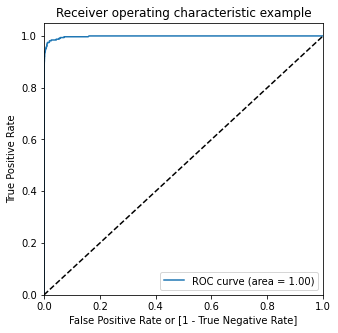

In [ ]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[84949    16]
 [   28   125]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9994830705608685
Sensitivity:- 0.8169934640522876
Specificity:- 0.9998116871653033
F1-Score:- 0.8503401360544216


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84965
           1       0.89      0.82      0.85       153

    accuracy                           1.00     85118
   macro avg       0.94      0.91      0.93     85118
weighted avg       1.00      1.00      1.00     85118



In [ ]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9716263405654539

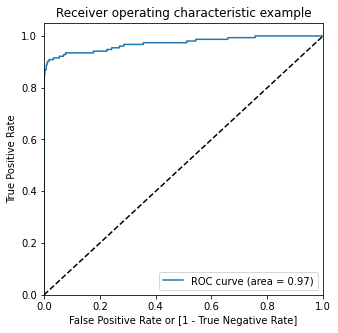

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 0.85
    - Specificity = 0.99
    - ROC-AUC = 0.99
    - F1-Score = 0.90
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.75
    - Specificity = 0.99
    - ROC-AUC = 0.98
    - F-Score = 0.79

Overall, the model is performing well in the test set, what it had learnt from the train set.

### Decision Tree

In [ ]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.502779,0.033771,0.025022,0.000353,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.914054,0.919987,0.933858,0.922633,0.008299,7
1,3.460152,0.029353,0.025312,0.000414,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.914140,0.919987,0.933844,0.922657,0.008263,6
2,3.468817,0.014792,0.026778,0.001256,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.939756,0.927388,0.934983,0.934042,0.005093,3
3,3.473228,0.019073,0.027217,0.001383,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.939756,0.927388,0.934969,0.934038,0.005092,4
4,6.782528,0.042295,0.027670,0.000570,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.905706,0.930116,0.940689,0.925504,0.014649,5
5,6.839996,0.083917,0.027472,0.000284,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.896765,0.930140,0.940651,0.922518,0.018709,8
6,6.755089,0.080328,0.028617,0.001373,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.932266,0.928100,0.946009,0.935459,0.007652,2
7,6.746342,0.074627,0.028271,0.001384,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.932268,0.928132,0.951187,0.937196,0.010036,1


In [ ]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9371956968312483
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100)


In [ ]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = dt_imb_model.predict(X_train)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
print(confusion)

[[198288      0]
 [     0    320]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.999118867316523
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 0.7097844112769486


In [ ]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198288
           1       0.76      0.67      0.71       320

    accuracy                           1.00    198608
   macro avg       0.88      0.83      0.85    198608
weighted avg       1.00      1.00      1.00    198608



In [ ]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9569803376275922

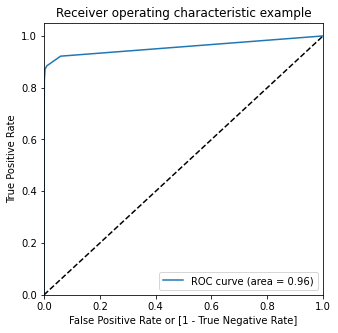

In [ ]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)


##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_pred = dt_imb_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[84928    37]
 [   44   109]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9990483798961441
Sensitivity:- 0.7124183006535948
Specificity:- 0.999564526569764
F1-Score:- 0.7097844112769486


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84965
           1       0.75      0.71      0.73       153

    accuracy                           1.00     85118
   macro avg       0.87      0.86      0.86     85118
weighted avg       1.00      1.00      1.00     85118



In [ ]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9428917097351505

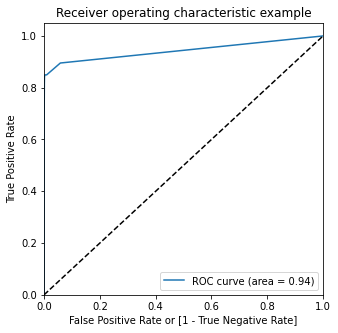

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 1.0
    - Specificity = 1.0
    - F1-Score = 0.75
    - ROC-AUC = 0.95
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.58
    - Specificity = 0.99
    - F-1 Score = 0.75
    - ROC-AUC = 0.92


### Random forest

In [ ]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)


Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.99917928784339 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 100}


In [ ]:
# model with the best hyperparameters

rfc_imb_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=100)

In [ ]:
# Fit the model
rfc_imb_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = rfc_imb_model.predict(X_train)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
print(confusion)

[[198288      0]
 [     0    320]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9993152340288407
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 0.7687074829931972


In [ ]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198288
           1       0.84      0.71      0.77       320

    accuracy                           1.00    198608
   macro avg       0.92      0.85      0.88    198608
weighted avg       1.00      1.00      1.00    198608



In [ ]:
# Predicted probability
y_train_pred_proba = rfc_imb_model.predict_proba(X_train)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9823638785503914

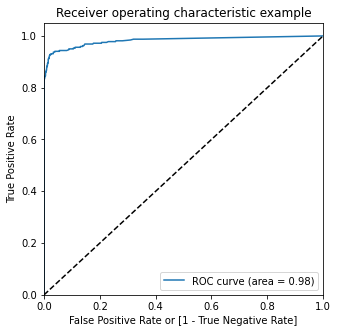

In [ ]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_pred = rfc_imb_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[84949    16]
 [   46   107]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9992715994266782
Sensitivity:- 0.6993464052287581
Specificity:- 0.9998116871653033
F1-Score:- 0.7687074829931972


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84965
           1       0.87      0.70      0.78       153

    accuracy                           1.00     85118
   macro avg       0.93      0.85      0.89     85118
weighted avg       1.00      1.00      1.00     85118



In [ ]:
# Predicted probability
y_test_pred_proba = rfc_imb_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9637031242006995

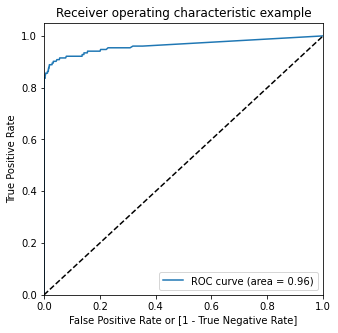

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 1.0
    - Specificity = 1.0
    - F1-Score = 0.80
    - ROC-AUC = 0.98
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.62
    - Specificity = 0.99
    - F-1 Score = 0.75
    - ROC-AUC = 0.96

# Handling data imbalance
UnderSampling<br>
Oversampling<br> 
Smote <br> 


## Undersampling

In [ ]:
# Importing undersampler library
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [ ]:
# instantiating the random undersampler 
rus = RandomUnderSampler()
# resampling X, y
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [ ]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_rus))

Before sampling class distribution:- Counter({0: 198288, 1: 320})
New class distribution:- Counter({0: 320, 1: 320})


## Model building on balanced data with Undersampling

### Logistic Regression

In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_rus, y_train_rus)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010552,0.001171,0.004231,0.000141,0.01,{'C': 0.01},0.978510,0.984623,0.971436,0.989003,0.970523,0.978819,0.007223,1,0.987594,0.987628,0.985947,0.984725,0.988887,0.986956,0.001455
1,0.015602,0.005941,0.004352,0.000144,0.1,{'C': 0.1},0.977534,0.985119,0.972168,0.985826,0.970032,0.978136,0.006474,2,0.990143,0.989675,0.989349,0.987380,0.990689,0.989447,0.001128
2,0.016396,0.001254,0.004214,0.000051,1,{'C': 1},0.978266,0.983879,0.970459,0.982649,0.967576,0.976566,0.006504,3,0.991531,0.991477,0.990921,0.989059,0.992642,0.991126,0.001175
3,0.021094,0.001281,0.004899,0.001299,10,{'C': 10},0.978755,0.981151,0.970703,0.981672,0.965119,0.975480,0.006502,5,0.991867,0.991829,0.991257,0.989639,0.993223,0.991563,0.001159
4,0.027733,0.002469,0.004557,0.000232,100,{'C': 100},0.979976,0.981399,0.970215,0.982160,0.964137,0.975577,0.007158,4,0.991882,0.991813,0.991287,0.990310,0.993436,0.991746,0.001015
5,0.034633,0.005030,0.005102,0.000163,1000,{'C': 1000},0.979976,0.981647,0.970703,0.981183,0.963400,0.975382,0.007204,6,0.991882,0.991829,0.991180,0.990341,0.993436,0.991734,0.001017


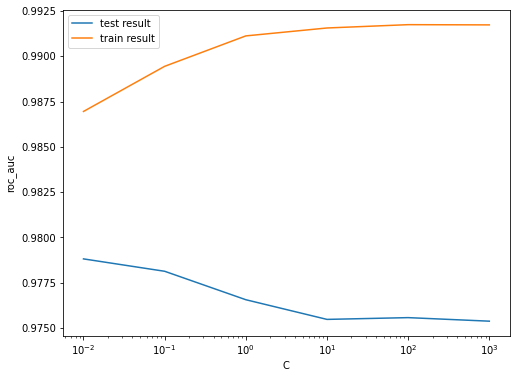

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9788190173559002 at C = 0.01


#### Logistic regression with optimal C

In [ ]:
# Instantiate the model with best C
logistic_bal_rus = LogisticRegression(C=0.1)

In [ ]:
# Fit the model on the train set
logistic_bal_rus_model = logistic_bal_rus.fit(X_train_rus, y_train_rus)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = logistic_bal_rus_model.predict(X_train_rus)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[317   3]
 [ 26 294]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_rus, y_train_pred))

Accuracy:- 0.9546875
Sensitivity:- 0.91875
Specificity:- 0.990625
F1-Score:- 0.9529983792544571


In [ ]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96       320
           1       0.99      0.92      0.95       320

    accuracy                           0.95       640
   macro avg       0.96      0.95      0.95       640
weighted avg       0.96      0.95      0.95       640



In [ ]:
# Predicted probability
y_train_pred_proba = logistic_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.988408203125

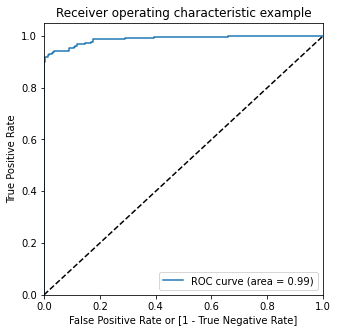

In [ ]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

#### Prediction on the test set

In [ ]:
# Prediction on the test set
y_test_pred = logistic_bal_rus_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[82997  1968]
 [   17   136]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9766794332573604
Sensitivity:- 0.8888888888888888
Specificity:- 0.9768375213323133


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     84965
           1       0.06      0.89      0.12       153

    accuracy                           0.98     85118
   macro avg       0.53      0.93      0.55     85118
weighted avg       1.00      0.98      0.99     85118



In [ ]:
# Predicted probability
y_test_pred_proba = logistic_bal_rus_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9781060175104781

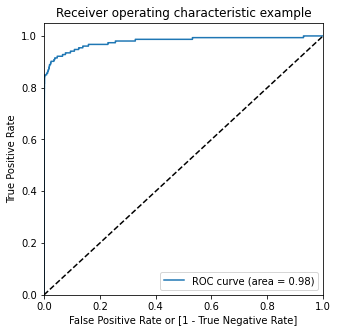

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.95
    - Sensitivity = 0.92
    - Specificity = 0.98
    - ROC = 0.99
- Test set
    - Accuracy = 0.97
    - Sensitivity = 0.86
    - Specificity = 0.97
    - ROC = 0.96

### XGBoost

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_rus, y_train_rus)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.094519,0.003396,0.005313,0.001482,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.990916,0.981397,0.981661,0.984658,0.004427,1,1.0,0.999978,1.0,0.999993,0.00001
1,0.114329,0.003175,0.005352,0.001426,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.991702,0.981749,0.977605,0.983686,0.005916,2,1.0,1.000000,1.0,1.000000,0.00000
2,0.115506,0.003721,0.004320,0.000049,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.989693,0.983248,0.975577,0.982840,0.005770,4,1.0,1.000000,1.0,1.000000,0.00000
3,0.075830,0.005176,0.003755,0.000101,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.978775,0.977341,0.976724,0.977613,0.000859,6,1.0,1.000000,1.0,1.000000,0.00000
4,0.090974,0.008788,0.003806,0.000221,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.986986,0.984218,0.979457,0.983554,0.003109,3,1.0,1.000000,1.0,1.000000,0.00000
5,0.085801,0.002752,0.004132,0.000144,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.985326,0.980162,0.978487,0.981325,0.002911,5,1.0,1.000000,1.0,1.000000,0.00000


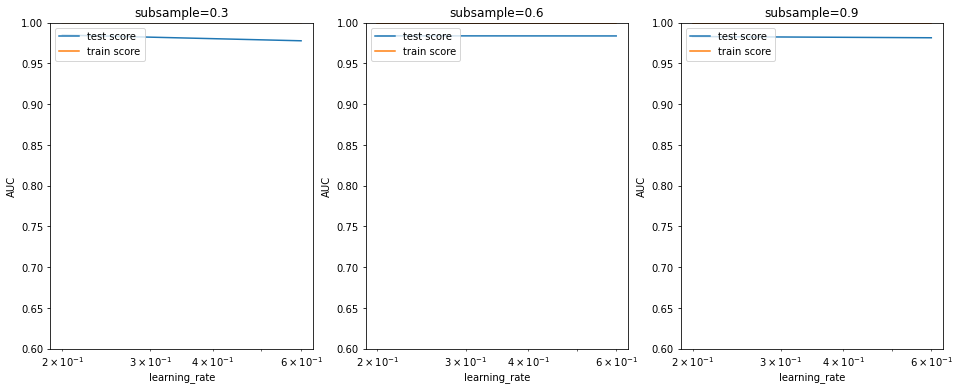

In [ ]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

##### Model with optimal hyperparameters
We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [ ]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.3}

In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_rus_model = XGBClassifier(params = params)
xgb_bal_rus_model.fit(X_train_rus, y_train_rus)

XGBClassifier(params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6})

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = xgb_bal_rus_model.predict(X_train_rus)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_rus)
print(confusion)

[[320   0]
 [  0 320]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0


In [ ]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       320
           1       1.00      1.00      1.00       320

    accuracy                           1.00       640
   macro avg       1.00      1.00      1.00       640
weighted avg       1.00      1.00      1.00       640



In [ ]:
# Predicted probability
y_train_pred_proba = xgb_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

1.0

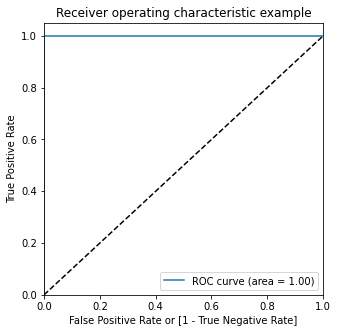

In [ ]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_pred = xgb_bal_rus_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[81651  3314]
 [   14   139]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9609013369675039
Sensitivity:- 0.9084967320261438
Specificity:- 0.9609957041134585


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     84965
           1       0.04      0.91      0.08       153

    accuracy                           0.96     85118
   macro avg       0.52      0.93      0.53     85118
weighted avg       1.00      0.96      0.98     85118



In [ ]:
# Predicted probability
y_test_pred_proba = xgb_bal_rus_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9700375279478786

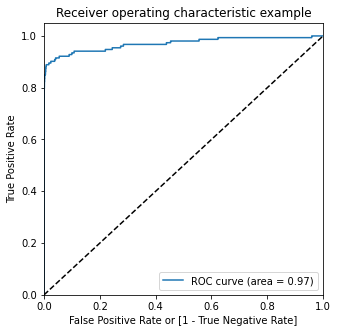

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 1.0
    - Sensitivity = 1.0
    - Specificity = 1.0
    - ROC-AUC = 1.0
- Test set
    - Accuracy = 0.96
    - Sensitivity = 0.92
    - Specificity = 0.96
    - ROC-AUC = 0.98

### Decision Tree

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_rus,y_train_rus)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006031,0.000680,0.003380,0.000049,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.971788,0.959134,0.967907,0.966276,0.005293,1
1,0.006027,0.000594,0.003199,0.000171,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.972312,0.954594,0.960324,0.962410,0.007382,4
2,0.005638,0.001547,0.003675,0.000467,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.955193,0.958914,0.949303,0.954470,0.003957,5
3,0.004742,0.000108,0.003393,0.000217,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.955193,0.958914,0.949303,0.954470,0.003957,5
4,0.006096,0.000207,0.003420,0.000033,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.972661,0.954594,0.967819,0.965025,0.007636,3
5,0.005857,0.000237,0.003226,0.000191,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.972661,0.955563,0.968171,0.965465,0.007238,2
6,0.004603,0.000097,0.004163,0.001189,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.955193,0.958914,0.949303,0.954470,0.003957,5
7,0.005068,0.000583,0.003353,0.000093,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.955193,0.958914,0.949303,0.954470,0.003957,5


In [ ]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9662763384349846
DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50)


In [ ]:
# Model with optimal hyperparameters
dt_bal_rus_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_bal_rus_model.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = dt_bal_rus_model.predict(X_train_rus)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[315   5]
 [ 42 278]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9265625
Sensitivity:- 0.86875
Specificity:- 0.984375


In [ ]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       320
           1       0.98      0.87      0.92       320

    accuracy                           0.93       640
   macro avg       0.93      0.93      0.93       640
weighted avg       0.93      0.93      0.93       640



In [ ]:
# Predicted probability
y_train_pred_proba = dt_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.9803124999999999

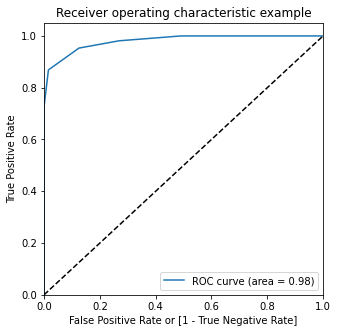

In [ ]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_pred = dt_bal_rus_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[81627  3338]
 [   18   135]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9605723818698748
Sensitivity:- 0.8823529411764706
Specificity:- 0.9607132348614136


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     84965
           1       0.04      0.88      0.07       153

    accuracy                           0.96     85118
   macro avg       0.52      0.92      0.53     85118
weighted avg       1.00      0.96      0.98     85118



In [ ]:
# Predicted probability
y_test_pred_proba = dt_bal_rus_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9520986919258179

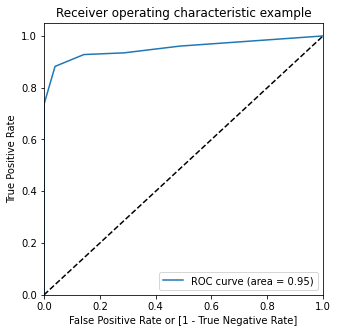

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.93
    - Sensitivity = 0.88
    - Specificity = 0.97
    - ROC-AUC = 0.98
- Test set
    - Accuracy = 0.96
    - Sensitivity = 0.85
    - Specificity = 0.96
    - ROC-AUC = 0.96

### Random forest

In [ ]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_rus, y_train_rus)


Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get roc-auc of',grid_search.best_score_,'using',grid_search.best_params_)

We can get roc-auc of 0.98140625 using {'max_depth': 5, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 100}


In [ ]:
# model with the best hyperparameters

rfc_bal_rus_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=200)

In [ ]:
# Fit the model
rfc_bal_rus_model.fit(X_train_rus, y_train_rus)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=200)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = rfc_bal_rus_model.predict(X_train_rus)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[316   4]
 [ 33 287]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_rus, y_train_pred))

Accuracy:- 0.9421875
Sensitivity:- 0.896875
Specificity:- 0.9875
F1-Score:- 0.939443535188216


In [ ]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94       320
           1       0.99      0.90      0.94       320

    accuracy                           0.94       640
   macro avg       0.95      0.94      0.94       640
weighted avg       0.95      0.94      0.94       640



In [ ]:
# Predicted probability
y_train_pred_proba = rfc_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.9883496093749999

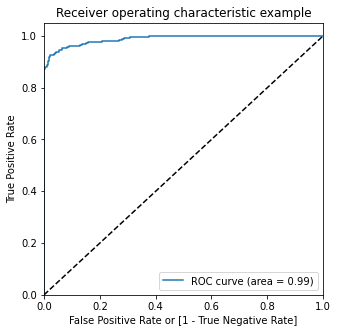

In [ ]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_pred = rfc_bal_rus_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[82648  2317]
 [   17   136]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9725792429333396
Sensitivity:- 0.8888888888888888
Specificity:- 0.9727299476254928


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     84965
           1       0.06      0.89      0.10       153

    accuracy                           0.97     85118
   macro avg       0.53      0.93      0.55     85118
weighted avg       1.00      0.97      0.98     85118



In [ ]:
# Predicted probability
y_test_pred_proba = rfc_bal_rus_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9681368991230145

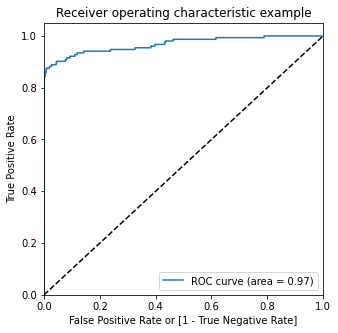

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.94
    - Sensitivity = 0.89
    - Specificity = 0.98
    - ROC-AUC = 0.98
- Test set
    - Accuracy = 0.98
    - Sensitivity = 0.83
    - Specificity = 0.98
    - ROC-AUC = 0.97

# Oversampling

In [ ]:
# Importing oversampler library
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# instantiating the random oversampler 
ros = RandomOverSampler()
# resampling X, y
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [ ]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_ros))

Before sampling class distribution:- Counter({0: 198288, 1: 320})
New class distribution:- Counter({0: 198288, 1: 198288})


### Logistic Regression

In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.840347,0.203658,0.048218,0.000556,0.01,{'C': 0.01},0.987749,0.988478,0.988124,0.987628,0.988536,0.988103,0.000369,6,0.988209,0.988018,0.988165,0.988160,0.988025,0.988115,0.000079
1,2.832072,0.239420,0.048816,0.001025,0.1,{'C': 0.1},0.987808,0.988569,0.988208,0.987721,0.988606,0.988182,0.000369,5,0.988292,0.988095,0.988249,0.988236,0.988105,0.988195,0.000080
2,3.098093,0.060065,0.050139,0.001950,1,{'C': 1},0.987809,0.988577,0.988215,0.987732,0.988616,0.988190,0.000371,4,0.988302,0.988103,0.988259,0.988245,0.988114,0.988204,0.000081
3,3.101327,0.138670,0.048604,0.000427,10,{'C': 10},0.987811,0.988579,0.988215,0.987733,0.988617,0.988191,0.000371,3,0.988303,0.988104,0.988260,0.988246,0.988115,0.988205,0.000081
4,3.168082,0.241436,0.050771,0.004864,100,{'C': 100},0.987811,0.988580,0.988216,0.987733,0.988617,0.988191,0.000371,2,0.988303,0.988104,0.988260,0.988246,0.988115,0.988206,0.000081
5,3.181514,0.244771,0.048103,0.000657,1000,{'C': 1000},0.987811,0.988580,0.988216,0.987733,0.988617,0.988192,0.000371,1,0.988303,0.988104,0.988260,0.988246,0.988115,0.988206,0.000081


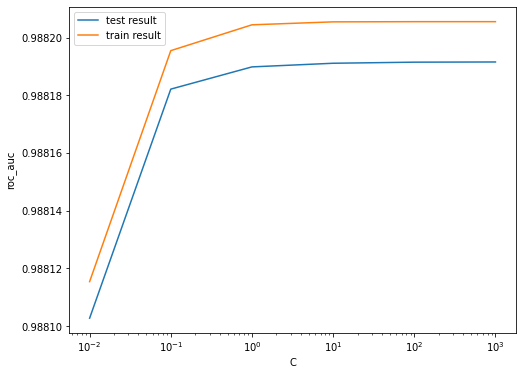

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9881915652525789 at C = 1000


#### Logistic regression with optimal C

In [ ]:
# Instantiate the model with best C
logistic_bal_ros = LogisticRegression(C=0.1)

In [ ]:
# Fit the model on the train set
logistic_bal_ros_model = logistic_bal_ros.fit(X_train_ros, y_train_ros)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = logistic_bal_ros_model.predict(X_train_ros)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)

[[193136   5152]
 [ 14270 184018]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_ros, y_train_pred))

Accuracy:- 0.9510257806826434
Sensitivity:- 0.9280339707899621
Specificity:- 0.9740175905753248
F1-Score:- 0.949873276587398


In [ ]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95    198288
           1       0.97      0.93      0.95    198288

    accuracy                           0.95    396576
   macro avg       0.95      0.95      0.95    396576
weighted avg       0.95      0.95      0.95    396576



In [ ]:
# Predicted probability
y_train_pred_proba = logistic_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.988192589580079

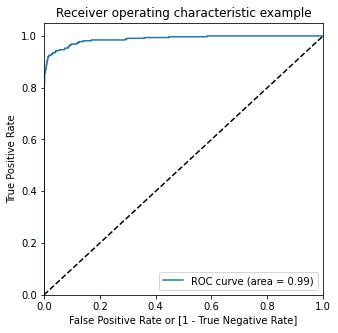

In [ ]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

#### Prediction on the test set

In [ ]:
# Prediction on the test set
y_test_pred = logistic_bal_ros_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[82685  2280]
 [   15   138]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9730374303907516
Sensitivity:- 0.9019607843137255
Specificity:- 0.9731654210557288


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     84965
           1       0.06      0.90      0.11       153

    accuracy                           0.97     85118
   macro avg       0.53      0.94      0.55     85118
weighted avg       1.00      0.97      0.98     85118



In [ ]:
# Predicted probability
y_test_pred_proba = logistic_bal_ros_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.97416756380655

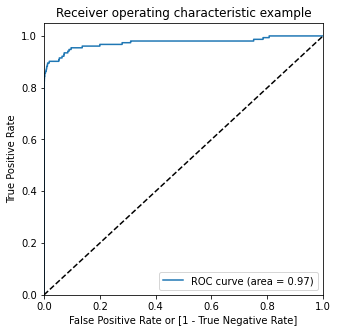

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.95
    - Sensitivity = 0.92
    - Specificity = 0.97
    - ROC = 0.98
- Test set
    - Accuracy = 0.97
    - Sensitivity = 0.89
    - Specificity = 0.97
    - ROC = 0.97

### XGBoost

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_ros, y_train_ros)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,58.780898,0.217420,0.747519,0.002022,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999934,0.999901,0.999917,0.999917,0.000013,4,0.999925,0.999929,0.999945,0.999933,8.723114e-06
1,68.509592,0.054594,0.746691,0.004780,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999922,0.999890,0.999893,0.999902,0.000015,6,0.999923,0.999935,0.999936,0.999931,5.668735e-06
2,67.461320,0.061931,0.753176,0.007192,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999927,0.999890,0.999897,0.999905,0.000016,5,0.999914,0.999921,0.999948,0.999928,1.474721e-05
3,58.471112,0.094592,0.768999,0.005104,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999994,0.999987,0.999970,0.999984,0.000010,2,1.000000,1.000000,1.000000,1.000000,1.092543e-08
4,68.520853,0.074727,0.755641,0.005661,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999996,0.999980,0.999972,0.999982,0.000010,3,1.000000,1.000000,1.000000,1.000000,1.752924e-07
5,67.412140,0.212282,0.752776,0.004471,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999988,0.999978,0.999993,0.999987,0.000007,1,1.000000,1.000000,1.000000,1.000000,1.324809e-07


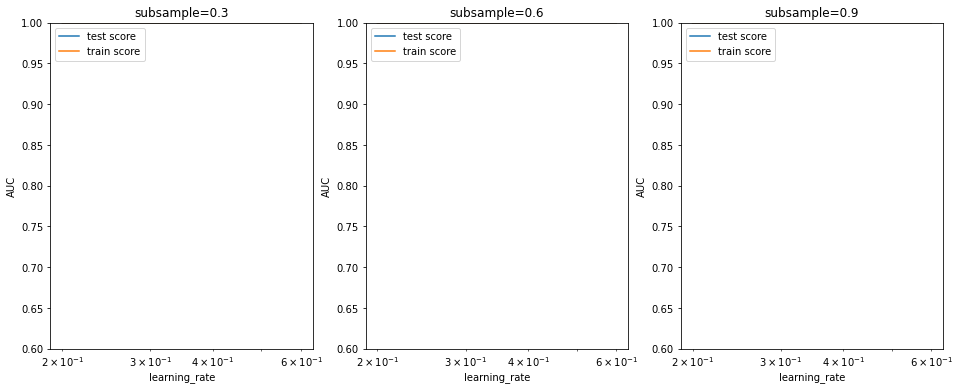

In [ ]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

##### Model with optimal hyperparameters
We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [ ]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [ ]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_ros_model = XGBClassifier(params = params)
xgb_bal_ros_model.fit(X_train_ros, y_train_ros)

XGBClassifier(params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9})

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = xgb_bal_ros_model.predict(X_train_ros)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_ros)
print(confusion)

[[198288      0]
 [     0 198288]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9973170338094085
Sensitivity:- 1.0
Specificity:- 1.0


In [ ]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    198288
           1       0.99      1.00      1.00    198288

    accuracy                           1.00    396576
   macro avg       1.00      1.00      1.00    396576
weighted avg       1.00      1.00      1.00    396576



In [ ]:
# Predicted probability
y_train_pred_proba = xgb_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.9997767821793844

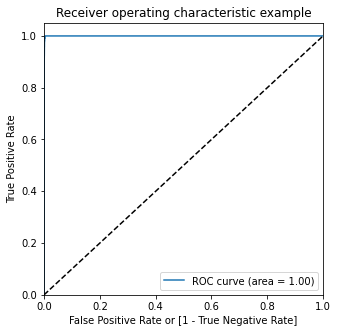

In [ ]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_pred = xgb_bal_ros_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[84461   504]
 [   20   133]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9938438403157969
Sensitivity:- 0.869281045751634
Specificity:- 0.9940681457070558


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     84965
           1       0.21      0.87      0.34       153

    accuracy                           0.99     85118
   macro avg       0.60      0.93      0.67     85118
weighted avg       1.00      0.99      1.00     85118



In [ ]:
# Predicted probability
y_test_pred_proba = xgb_bal_ros_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9693407012268411

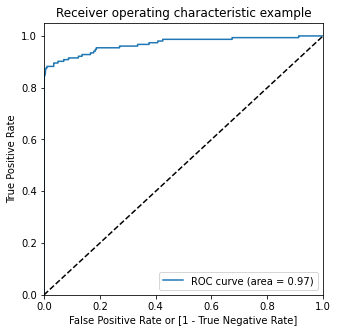

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 1.0
    - Sensitivity = 1.0
    - Specificity = 1.0
    - ROC-AUC = 1.0
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.80
    - Specificity = 0.99
    - ROC-AUC = 0.97

### Decision Tree

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_ros,y_train_ros)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4.125565,0.018088,0.051046,0.000389,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.989283,0.989708,0.989482,0.989491,0.000174,5
1,4.107408,0.029932,0.051423,0.000612,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.989283,0.989708,0.989482,0.989491,0.000174,5
2,4.084513,0.020626,0.051769,0.000300,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.989283,0.989708,0.989482,0.989491,0.000174,5
3,4.060750,0.005773,0.051573,0.001427,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.989283,0.989708,0.989482,0.989491,0.000174,5
4,6.267082,0.056635,0.051939,0.000787,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.999714,0.999664,0.999640,0.999673,0.000031,1
5,6.307874,0.051605,0.054032,0.004146,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.999663,0.999657,0.999619,0.999646,0.000020,2
6,6.296337,0.018352,0.051962,0.000944,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.999675,0.999604,0.999622,0.999633,0.000030,3
7,6.308707,0.056639,0.052134,0.001694,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.999634,0.999605,0.999612,0.999617,0.000013,4


In [ ]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9996728112529478
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [ ]:
# Model with optimal hyperparameters
dt_bal_ros_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_ros_model.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = dt_bal_ros_model.predict(X_train_ros)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)

[[196867   1421]
 [     0 198288]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9964168280480916
Sensitivity:- 1.0
Specificity:- 0.9928336560961833


In [ ]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    198288
           1       0.99      1.00      1.00    198288

    accuracy                           1.00    396576
   macro avg       1.00      1.00      1.00    396576
weighted avg       1.00      1.00      1.00    396576



In [ ]:
# Predicted probability
y_train_pred_proba = dt_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.9997788468375471

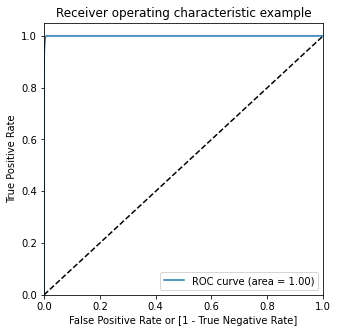

In [ ]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_pred = dt_bal_ros_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[84341   624]
 [   27   126]]


In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9923517939801217
Sensitivity:- 0.8235294117647058
Specificity:- 0.992655799446831


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     84965
           1       0.17      0.82      0.28       153

    accuracy                           0.99     85118
   macro avg       0.58      0.91      0.64     85118
weighted avg       1.00      0.99      0.99     85118



In [ ]:
# Predicted probability
y_test_pred_proba = dt_bal_ros_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9109132595543955

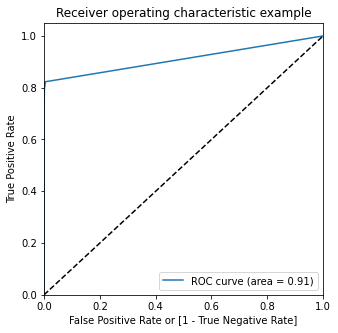

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 1.0
    - Specificity = 0.99
    - ROC-AUC = 0.99
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.79
    - Specificity = 0.99
    - ROC-AUC = 0.90

# SMOTE (Synthetic Minority Oversampling Technique)

We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

In [ ]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

In [ ]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)
# Fitting SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)

AttributeError: ignored

In [ ]:
print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)

### Logistic Regression

In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

#### Logistic regression with optimal C

In [ ]:
# Instantiate the model with best C
logistic_bal_smote = LogisticRegression(C=0.1)

In [ ]:
# Fit the model on the train set
logistic_bal_smote_model = logistic_bal_smote.fit(X_train_smote, y_train_smote)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = logistic_bal_smote_model.predict(X_train_smote)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

In [ ]:
# Predicted probability
y_train_pred_proba_log_bal_smote = logistic_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [ ]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_log_bal_smote)

#### Prediction on the test set

In [ ]:
# Prediction on the test set
y_test_pred = logistic_bal_smote_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

##### ROC on the test set

In [ ]:
# Predicted probability
y_test_pred_proba = logistic_bal_smote_model.predict_proba(X_test)[:,1]

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.95
    - Sensitivity = 0.92
    - Specificity = 0.98
    - ROC = 0.99
- Test set
    - Accuracy = 0.97
    - Sensitivity = 0.90
    - Specificity = 0.99
    - ROC = 0.97

### XGBoost

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_smote, y_train_smote)       

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

##### Model with optimal hyperparameters
We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [ ]:
model_cv.best_params_

In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(X_train_smote, y_train_smote)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = xgb_bal_smote_model.predict(X_train_smote)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

In [ ]:
# Predicted probability
y_train_pred_proba = xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

In [ ]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_pred = xgb_bal_smote_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

In [ ]:
# Predicted probability
y_test_pred_proba = xgb_bal_smote_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 1.0
    - Specificity = 0.99
    - ROC-AUC = 1.0
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.79
    - Specificity = 0.99
    - ROC-AUC = 0.96

Overall, the model is performing well in the test set, what it had learnt from the train set.

### Decision Tree

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

In [ ]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

In [ ]:
# Model with optimal hyperparameters
dt_bal_smote_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_bal_smote_model.fit(X_train_smote, y_train_smote)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = dt_bal_smote_model.predict(X_train_smote)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

In [ ]:
# Predicted probability
y_train_pred_proba = dt_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

In [ ]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_pred = dt_bal_smote_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

In [ ]:
# Predicted probability
y_test_pred_proba = dt_bal_smote_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 0.99
    - Specificity = 0.98
    - ROC-AUC = 0.99
- Test set
    - Accuracy = 0.98
    - Sensitivity = 0.80
    - Specificity = 0.98
    - ROC-AUC = 0.86


In [ ]:
## AdaSyn (Adaptive Synthetic Sampling)

In [ ]:
# Importing adasyn
from imblearn.over_sampling import ADASYN

In [ ]:
# Instantiate adasyn
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

In [ ]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_train_adasyn))

### Logistic Regression

In [ ]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

#### Logistic regression with optimal C

In [ ]:
# Instantiate the model with best C
logistic_bal_adasyn = LogisticRegression(C=1000)

In [ ]:
# Fit the model on the train set
logistic_bal_adasyn_model = logistic_bal_adasyn.fit(X_train_adasyn, y_train_adasyn)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = logistic_bal_adasyn_model.predict(X_train_adasyn)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_adasyn, y_train_pred))

In [ ]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

In [ ]:
# Predicted probability
y_train_pred_proba = logistic_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

In [ ]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Prediction on the test set

In [ ]:
# Prediction on the test set
y_test_pred = logistic_bal_adasyn_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

In [ ]:
# Predicted probability
y_test_pred_proba = logistic_bal_adasyn_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.88
    - Sensitivity = 0.86
    - Specificity = 0.91
    - ROC = 0.96
- Test set
    - Accuracy = 0.90
    - Sensitivity = 0.95
    - Specificity = 0.90
    - ROC = 0.97

### Decision Tree

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

In [ ]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

In [ ]:
# Model with optimal hyperparameters
dt_bal_adasyn_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = dt_bal_adasyn_model.predict(X_train_adasyn)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

In [ ]:
# Predicted probability
y_train_pred_proba = dt_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

In [ ]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_pred = dt_bal_adasyn_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

In [ ]:
# Predicted probability
y_test_pred_proba = dt_bal_adasyn_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.97
    - Sensitivity = 0.99
    - Specificity = 0.95
    - ROC-AUC = 0.99
- Test set
    - Accuracy = 0.95
    - Sensitivity = 0.84
    - Specificity = 0.95
    - ROC-AUC = 0.91

### XGBoost

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)       

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [ ]:
model_cv.best_params_

In [ ]:
# chosen hyperparameters

params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_adasyn_model = XGBClassifier(params = params)
xgb_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = xgb_bal_adasyn_model.predict(X_train_adasyn)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_adasyn)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

In [ ]:
# Predicted probability
y_train_pred_proba = xgb_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

In [ ]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_pred = xgb_bal_adasyn_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

In [ ]:
# Predicted probability
y_test_pred_proba = xgb_bal_adasyn_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 1.0
    - Specificity = 1.0
    - ROC-AUC = 1.0
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.78
    - Specificity = 0.99
    - ROC-AUC = 0.96

#### Print the FPR,TPR & select the best threshold from the roc curve for the best model

In [ ]:
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_pred_proba_log_bal_smote))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_proba_log_bal_smote)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

We can see that the threshold is 0.53, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.